# Data Visalization with seaborn

In [3]:
import pandas as pd
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

This notebook has been built following seaborn's documentation. Keep it close as you begin your Seaborn journey:

* [Official seaborn tutorial page](https://seaborn.pydata.org/tutorial.html)

* [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)

In this notebook we are going to look at seaborn's figure-level functions, as opposed to their axes-level functions. There are intrinsic differences between these two types of functions, but what you need to know is:
* Figure level: three basic functions to be used depending on what kind of data are you plotting e.g. `.catplot()` for categorical data
* Axes-level: many functions, one for each specific type of plot e.g `.barplot()`, `.histplot()`, etc.

Seaborn recommends using figure-level plots for most applications as they produce "slightly cleaner plots". Axes-level plots should only be used when you need to produce "complex, standalone figures that compose multiple different plot kinds".

There are 3 different types of figure-level plots in seaborn
* `.catplot()` - for categorical plots (discrete data)
* `.displot()` - for distributions (continuous data)
* `.relplot()` - for relational plots (do the features have a relationship?)

As seaborn is a well maintained and well known library, most of the parameters for these 3 types of figure-level plots are the same, which makes our lives very easy. It means that you only need to learn one set of skills and then you can apply it to many different situations. We will first look at `.catplot()`, showing you most of the universal parameters. Then we'll look at `.displot()` and `.relplot` to show you how to apply these parameters, and highlight a couple of unique ones too.

In this tutorial we'll use the titanic dataset, which is quite famous in the data science world. It can be easily loaded from seaborn itself.

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1.&nbsp; Categorical data: `catplot`

Use this function whenever you want to plot a categorical feature. You might want to plot it together with a numerical feature: still, `catplot` is your function as long as one of the features is categorical.

[.catplot() docs](https://seaborn.pydata.org/generated/seaborn.catplot.html)


[Seaborn tutorial for plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html)

### 1.1.&nbsp; Selecting features

#### 1.1.1.&nbsp; `x` and `y`
One of the nicest things about seaborn's figure-level functions is that we can feed them a whole DataFrame, and then just select the columns we want to plot in their parameters. Seaborn will then do the rest, sometimes even aggregating the data for us.

Below we can see how much people paid and which class they were in. The columns passed to the `x` and `y` parameters get allocated to the horizontal and vertical axis respectively:

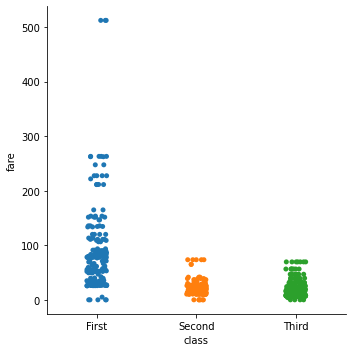

In [ ]:
sns.catplot(data=titanic, 
            x="class", 
            y="fare"
            );

Looks like a few people paid a lot more than everyone else in first class!

#### 1.1.2.&nbsp; `hue`
We can also divide our data by colour using the `hue` parameter. 

Now we can see the same data as above, but divided by `sex`.

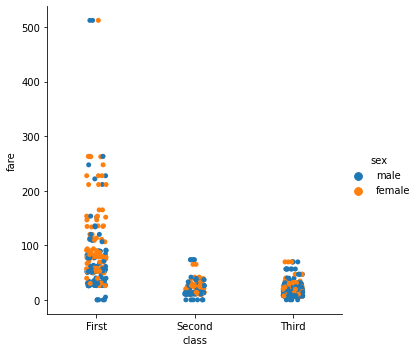

In [ ]:
sns.catplot(data=titanic, 
            x="class", 
            y="fare",
            hue="sex"
            );

> **Tip:** It only makes sense to use the `hue` parameter with a categorical feature that has a small number of categories, like `sex`. Try passing `fare` or `age` to the parameter and you'll see why...

#### 1.1.3.&nbsp; `col`
It is also possible to create multiple plots based on a category, which will share a y-axis - we simply place this category in the `col` parameter. 

Below we can see how much people paid, the class they travelled in, their sex, and in which port they boarded the boat.

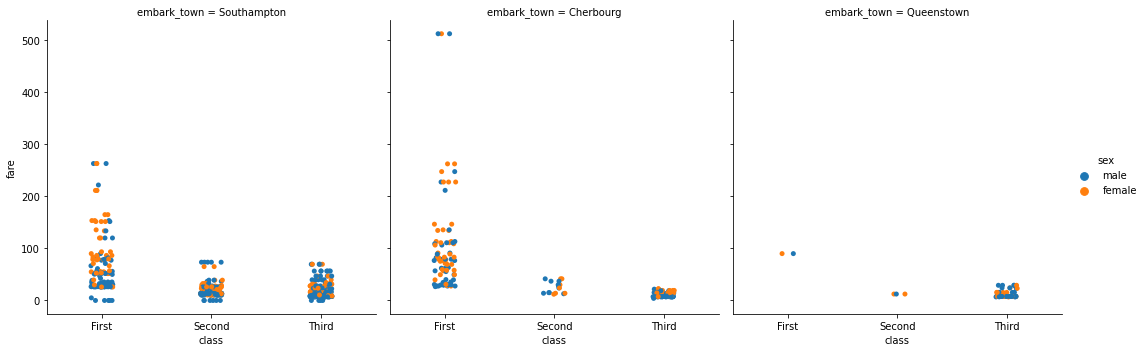

In [ ]:
sns.catplot(data=titanic, 
            x="class", 
            y="fare", 
            hue="sex", 
            col="embark_town");

Interesting to see that almost everyone who boarded in [Queenstown](https://en.wikipedia.org/wiki/Cobh) had a third class ticket. Feel free to deliberate about the reasons why later.

> **Tip:** Complex plots that combine many variables together are a good exploratory tool. They allow Data Analysts to uncover hidden insights. However, these plots are generally terrible for presentations where the audience does not have a lot of time to analyse the plot. In presentations, always use only simple plots conveying a clear message. If a complex plot is needed, either send it beforehand to the audience or take the time to explain it during the presentation.

##### `col_wrap`
Sometimes, if the feature you selected for `col` has many categories it may struggle to be legible on the screen, such as the example below.

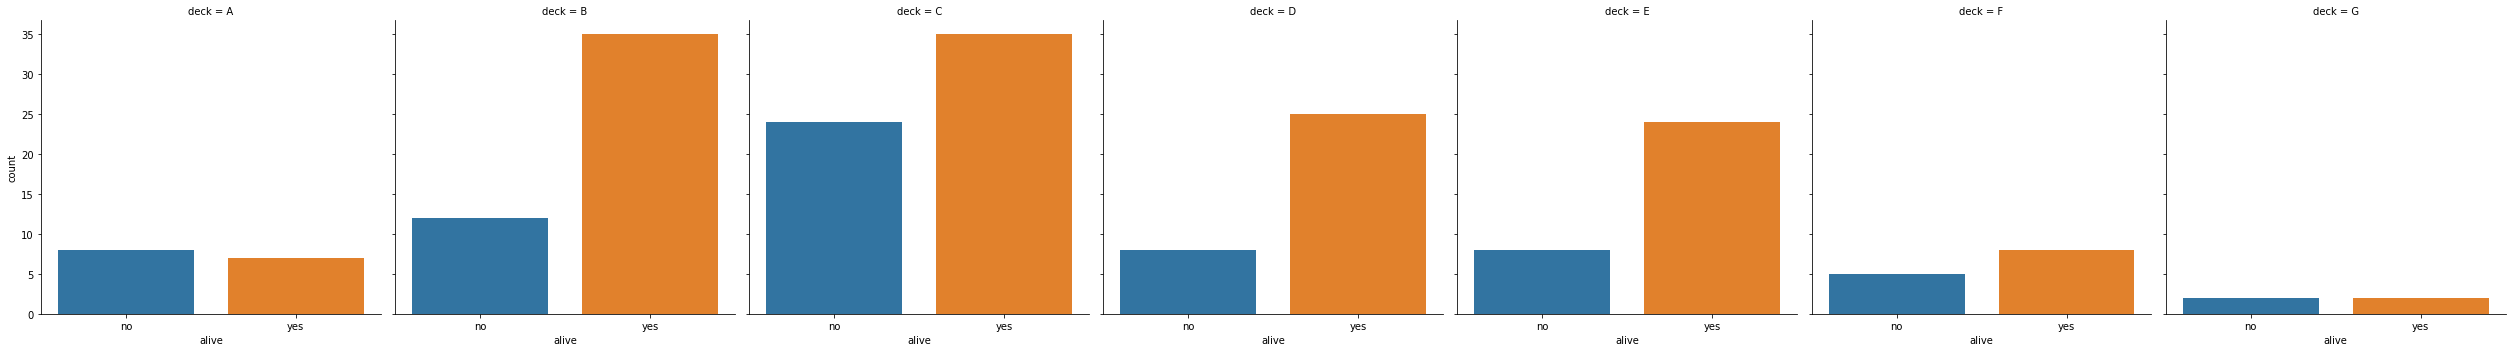

In [ ]:
sns.catplot(data=titanic, 
            x="alive", 
            col="deck", 
            kind="count");

It is possible to spread out the columns over multiple lines using the parameter `col_wrap`

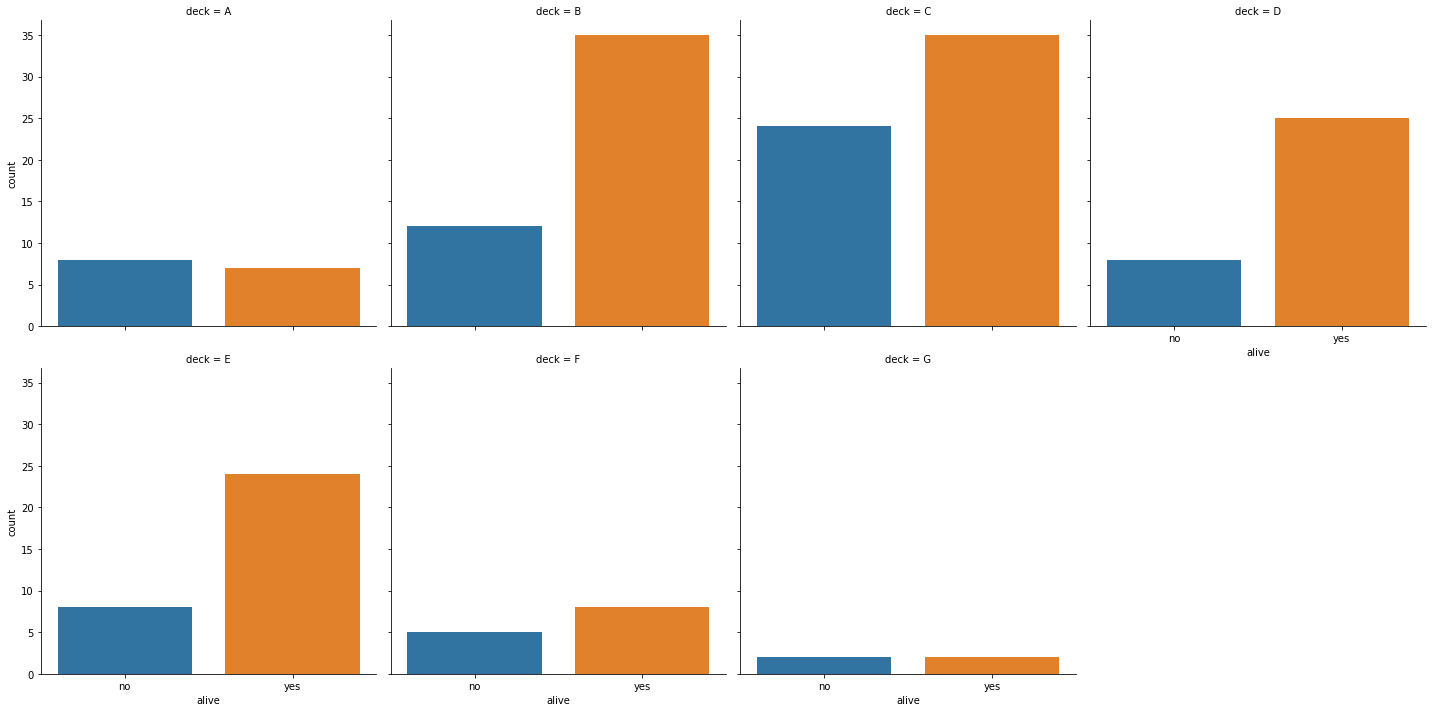

In [ ]:
sns.catplot(data=titanic, 
            x="alive", 
            col="deck", 
            col_wrap=4, 
            kind="count");

#### 1.1.3.&nbsp; `row`
You can also split the categories vertically using the `row` parameter.

Here, we've used a `.displot()`, we'll go through those later in the notebook

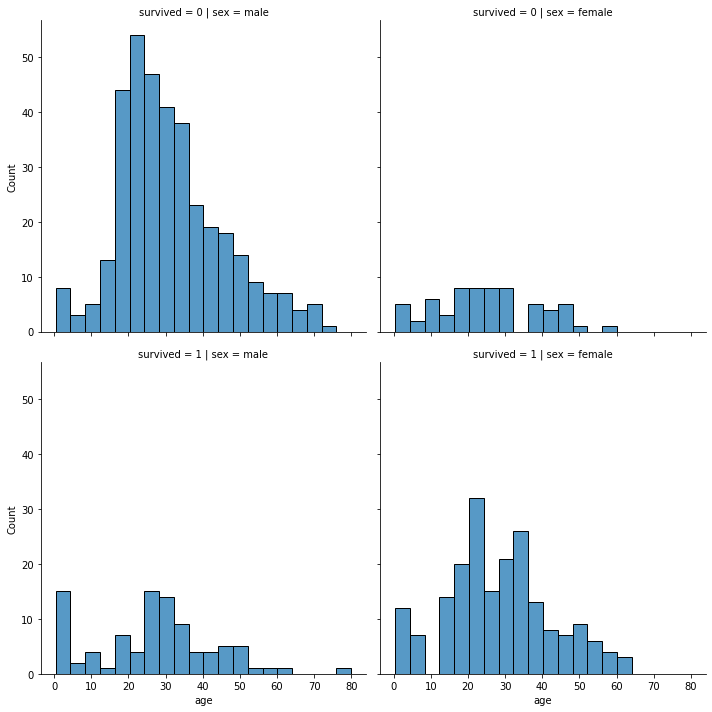

In [ ]:
sns.displot(data=titanic, 
            x="age", 
            col="sex", 
            row="survived");

### 1.2.&nbsp; Selecting the type of plot
You may have noticed above that we also used the parameter `kind`, we can use this to change the type of categorical plot.

Categorical scatterplots:

* [.stripplot()](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot) - `kind="strip"` the default

* [.swarmplot()](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) - `kind="swarm"`

Categorical distribution plots:

* [.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) - `kind="box"`

* [.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) - `kind="violin"`

* [.boxenplot()](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) - `kind="boxen"`

Categorical estimate plots:

* [.pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) - `kind="point"`

* [.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) - `kind="bar"`

* [.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) - `kind="count"`

Each of these `kind`s have individual parameters that you can find on their documentation page.

#### 1.2.1.&nbsp; `kind = "bar"`
* The height of the bar is the arithmetic mean of the values.
* Black lines are the [confidence interval](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/introduction-confidence-intervals/v/confidence-intervals-and-margin-of-error).
  * Can be controlled with the parameter `ci`:
    * `float`: size of confidence interval - default `95`
    * `"sd"`: draw standard deviation with black lines
    * `None`: don't draw black lines

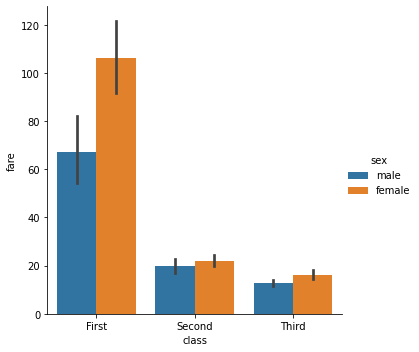

In [ ]:
sns.catplot(kind="bar",
            data=titanic, 
            x="class", 
            y="fare", 
            hue="sex");

Why did women pay more on average?

#### 1.2.2.&nbsp; `kind = count`
A `count` plot shows the count of each category.

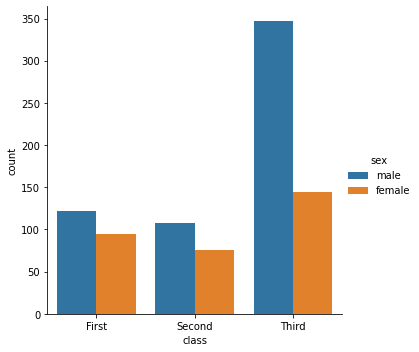

In [ ]:
sns.catplot(kind="count",
            data=titanic, 
            x="class", 
            hue="sex");

That's a big gender imbalance in third class!

### 1.3.&nbsp; Changing the size of a plot

#### 1.3.1.&nbsp; `height`
The official documentation says the `height` is the "Height (in inches) of each facet." Inches don't always translate on the screen, due to zoom, pixel density and other things, so take the interpretation of the number with a pinch of salt.

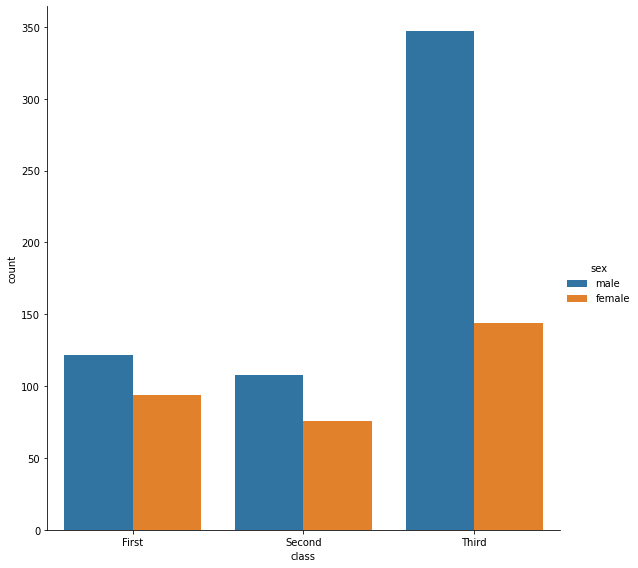

In [ ]:
sns.catplot(kind="count",
            data=titanic, 
            x="class", 
            hue="sex", 
            height=8);

In [ ]:
titanic.fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

#### 1.3.2.&nbsp; aspect
Officially aspect is the "ratio of each facet, so that aspect * height gives the width of each facet in inches." It's probably more easily undorstood as affecting the width of the plot.

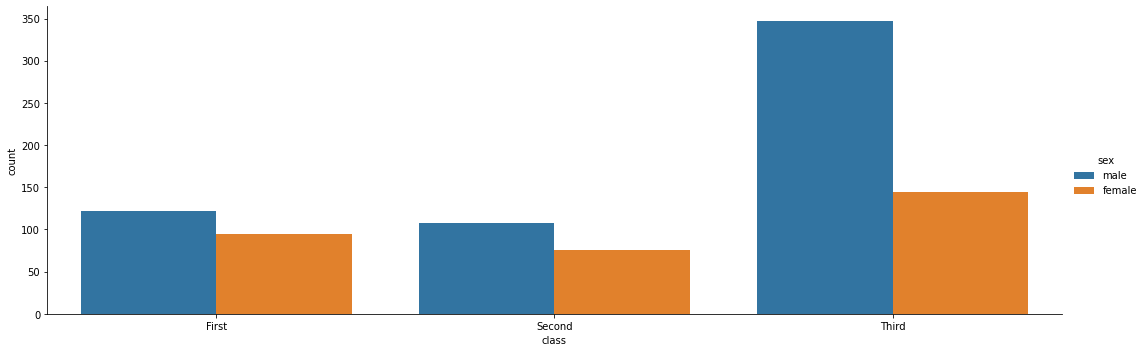

In [ ]:
sns.catplot(kind="count", 
            data=titanic, 
            x="class", 
            hue="sex", 
            aspect=3);

Both `height` and `aspect` can be used together to control the overall size of a plot.

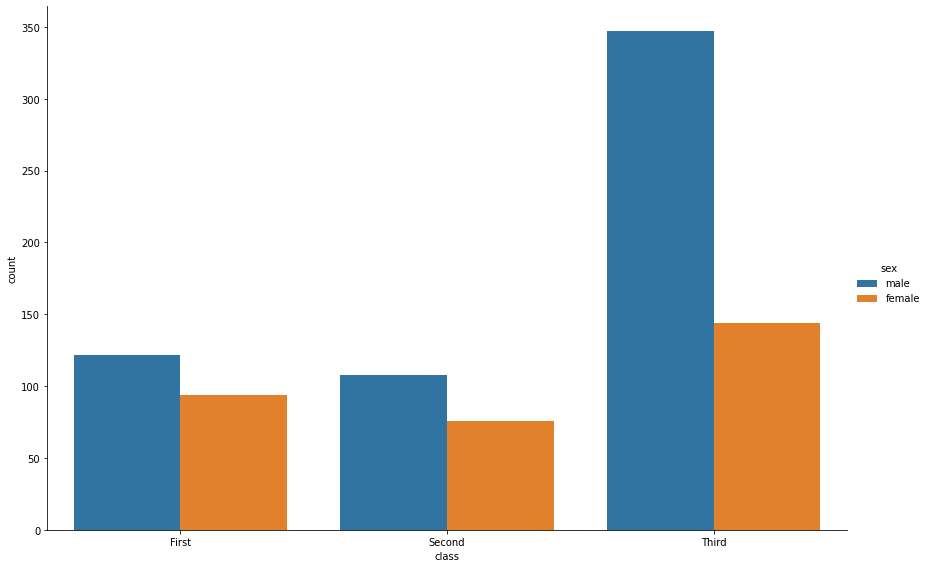

In [ ]:
sns.catplot(kind="count",
            data=titanic, 
            x="class", 
            hue="sex",
            height=8, 
            aspect=1.5);

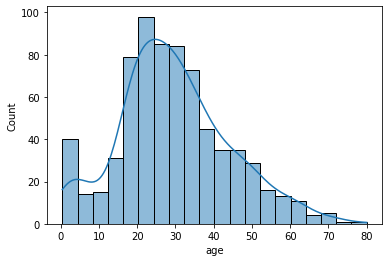

In [ ]:
sns.histplot(data=titanic,
            x='age',
            kde=True);

### 1.4.&nbsp; Changing the colour
[Colour documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

#### 1.4.1.&nbsp; `color`
With the `color` parameter we can choose a specific colour for the plot. Obviously, you should not use this parameter if you are already using `hue` to define the colour of the plot based on a variable.

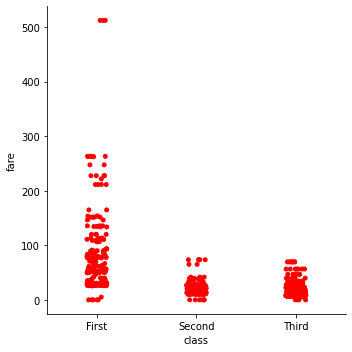

In [ ]:
sns.catplot(data=titanic,
            x="class", 
            y="fare", 
            color="red");

#### 1.4.2. `palette`
With `palette` we can choose a range of colours for the plot. In this case, you can use a palette together with `hue` to define which colors will be taken by each category. 

Seaborn is know for it's great colours, please explore the documentation and experiment.

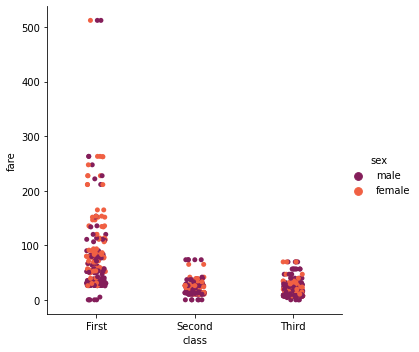

In [ ]:
sns.catplot(data=titanic,
            x="class", 
            y="fare", 
            hue="sex",
            palette="rocket");

> **Tip:** Making a plot _exactly_ how you want it to be can be very challenging, and you are just at the start of your journey. For now, embrace default options, prioritize simplicity and take it one step at a time. In some cases, expressing the message that the plot conveys in a simple sentence is as useful or more as the plot itself!

# Challenge 1:
Make a plot that shows the number of passengers who survived and the number who died. Divide this data by sex and class. Feel free to play around with other parameters such as height and palette too.

In [ ]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


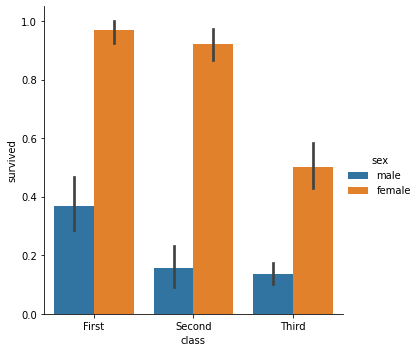

In [ ]:
# your code here
sns.catplot(kind="bar",
            data=titanic, 
            x="class", 
            y="survived", 
            hue="sex");

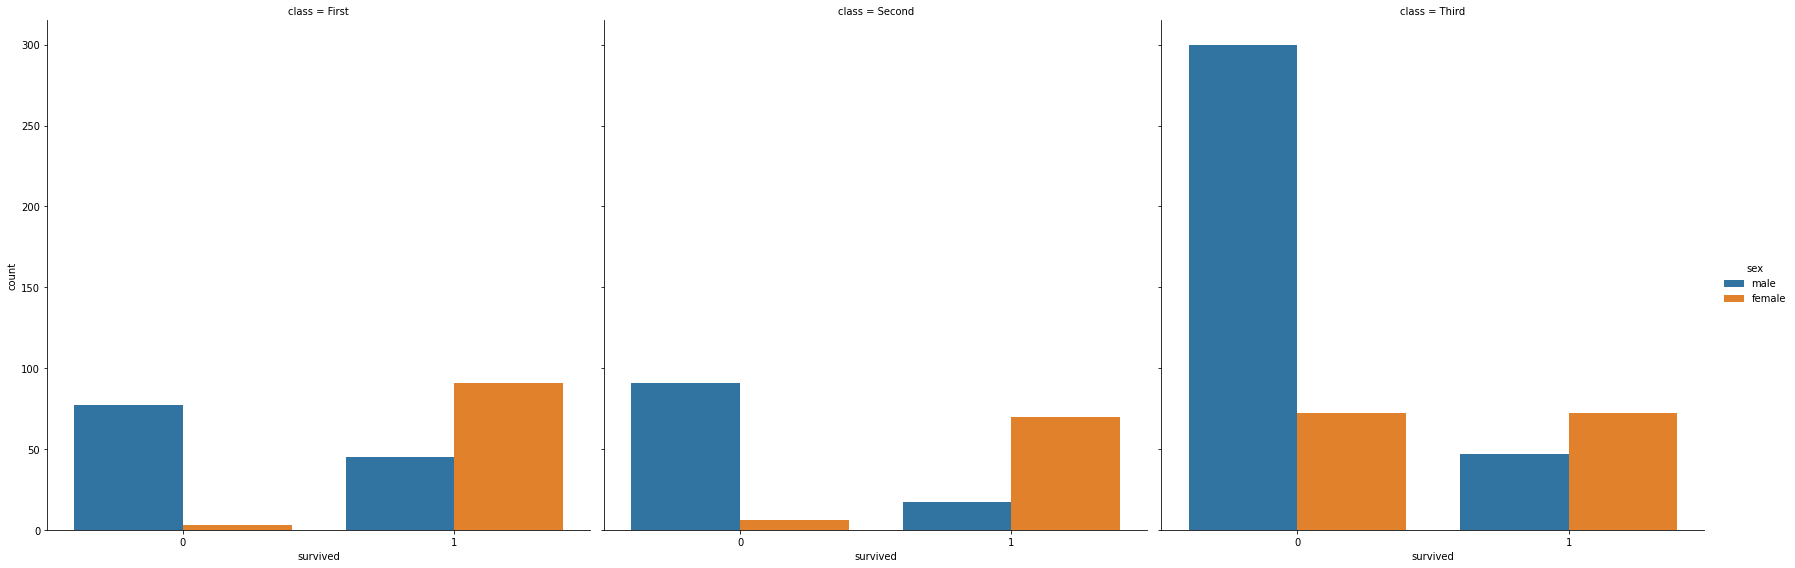

In [ ]:
sns.catplot(kind="count",
            data=titanic, 
            x="survived", 
            hue="sex", 
            col="class",
            height=8);

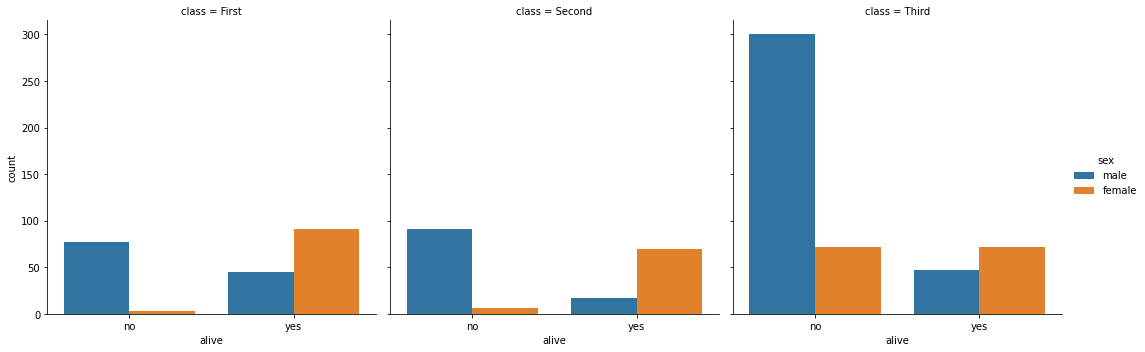

In [ ]:
sns.catplot(kind="count",
            data=titanic, 
            x="alive",
            hue="sex",
            col="class");
            #col_wrap=2);

## 2.&nbsp; Distributions: `.displot()`
[.displot() docs](https://seaborn.pydata.org/generated/seaborn.displot.html)


[Seaborn tutorial for plotting distributions](https://seaborn.pydata.org/tutorial/distributions.html)

`kind`s of `.displot()`:
* [.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) - `kind="hist"` the default
* [.kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) - `kind="kde"`
* [.ecdfplot()](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot) - `kind="ecdf"`

### 2.1.&nbsp; Universal parameters
Just like above, we can use `x`, `hue`, `col`, `color`, etc... The main difference you'll find here, is that in some `.catplot()`s you used 2 features `x` and `y`, distributions look at only one feature, so we won't be using the `y` parameter much.

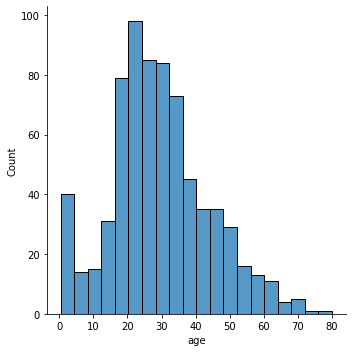

In [ ]:
sns.displot(data=titanic, 
            x="age");

We may not be using `y` for histograms, but we can still utilise `hue` and `col` to gain insights.

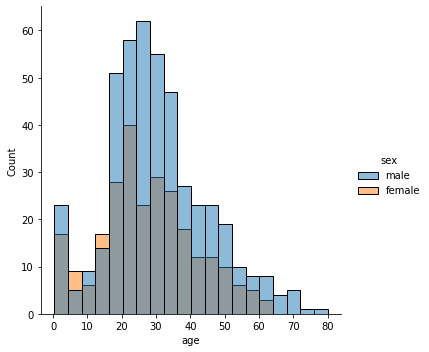

In [ ]:
sns.displot(data=titanic, 
            x="age", 
            hue="sex");

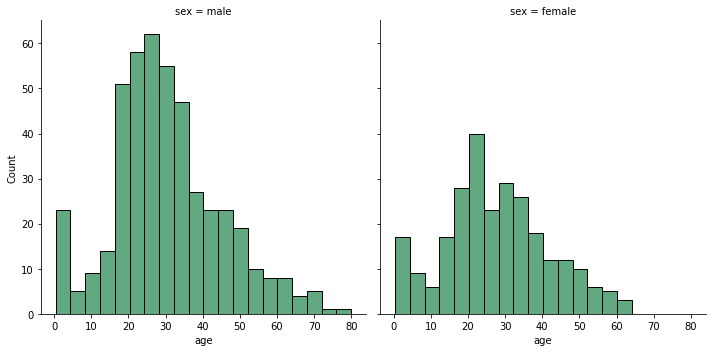

In [ ]:
sns.displot(data=titanic, 
            x="age", 
            col="sex", 
            color="seagreen");

### 2.2.&nbsp; Parameters unique to histograms
We use histograms a lot to get an idea of how our data is distributed, so let's look quickly how we can improve on the basic plot.

#### 2.2.1.&nbsp; Changing the aggregate

##### `stat`
`stat` is an aggregate to compute each bin:
* `count`: show the number of observations in each bin
* `frequency`: show the number of observations divided by the bin width
* `probability`: or proportion: normalize such that bar heights sum to 1
* `percent`: normalize such that bar heights sum to 100
* `density`: normalize such that the total area of the histogram equals 1

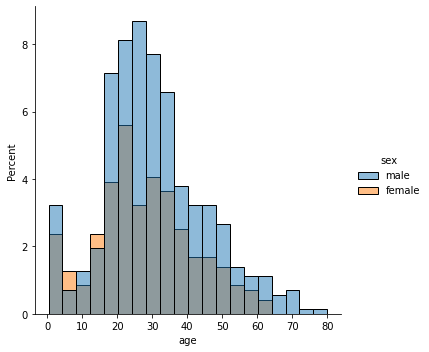

In [ ]:
sns.displot(data=titanic,
            x="age", 
            hue="sex",
            stat="percent");

#### 2.2.2.&nbsp; Changing the granularity

##### `bins` or `binwidth`

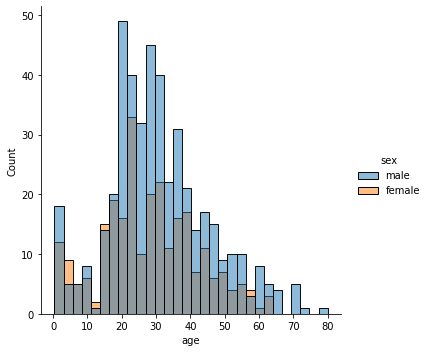

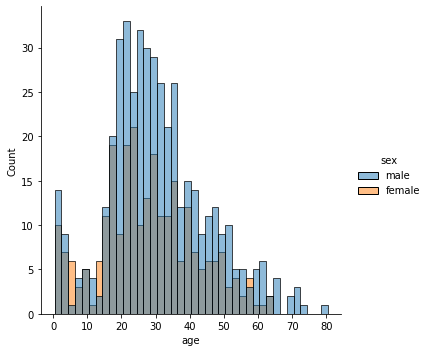

In [ ]:
sns.displot(data=titanic, 
            x="age", 
            hue="sex", 
            bins=30),
sns.displot(data=titanic, 
            x="age", 
            hue="sex", 
            binwidth=2);

The higher the number of `bins`, or smaller the `binwidth` the greater the granularity.

#### 2.2.3.&nbsp; Tracing the trend
We can also trace a smooth curve along the histogram using the `kde` parameter. If you're unsure what `kde` is, take a look in the next section `kde` is also a standalone plot from `.displot()`

##### The `kde` parameter:

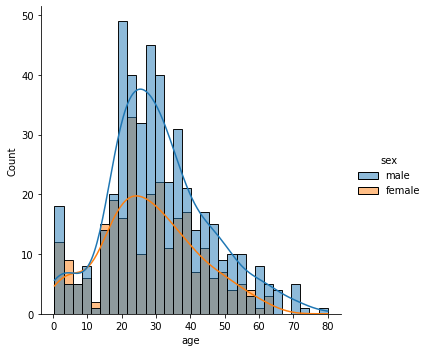

In [ ]:
sns.displot(data=titanic, 
            x="age", 
            hue="sex", 
            bins=30, 
            kde=True);

### 2.3.&nbsp; `kde` plots
Seaborn explains a `kde` plot very well: 

> "A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. [...] Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth."



Essentially, it's another way of viewing the same information as a histogram. They both have their (de)merits.


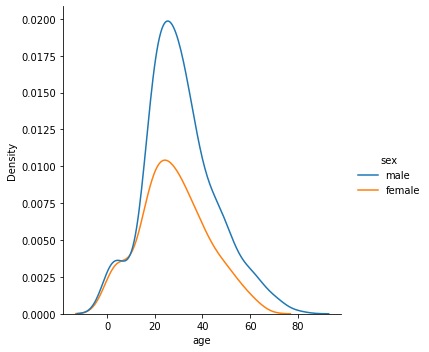

In [ ]:
sns.displot(kind="kde",
            data=titanic, 
            x="age",
            hue="sex");

## 3.&nbsp; Relational data: `.relplot()`
https://seaborn.pydata.org/generated/seaborn.relplot.html

https://seaborn.pydata.org/tutorial/relational.html

[.relplot() docs](https://seaborn.pydata.org/generated/seaborn.relplot.html)


[Seaborn tutorial for plotting statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)

`kind`s of `.relplot()`
* [.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) - `kind="scatter"` the default
* [.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) - `kind="line"`

### 3.1.&nbsp; Universal parameters
As relational plots are comparing the relationship between features, here, unlike a distribution plot, we will generally always have an `x` and a `y`.

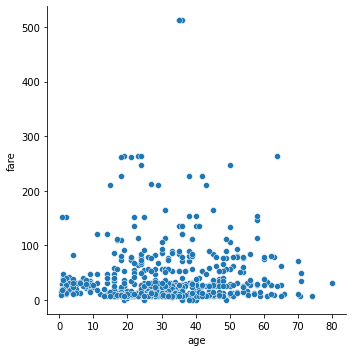

In [ ]:
sns.relplot(data=titanic,
            x="age", 
            y="fare");

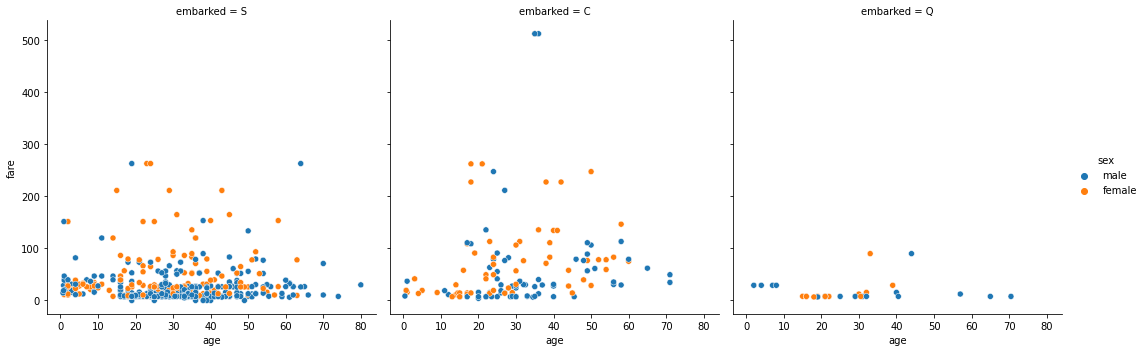

In [ ]:
sns.relplot(data=titanic, 
            x="age", 
            y="fare", 
            hue="sex", 
            col="embarked");

### 3.2.&nbsp; Specific to scatter

#### 3.2.1.&nbsp; Changing the shape of the marker

##### `style`

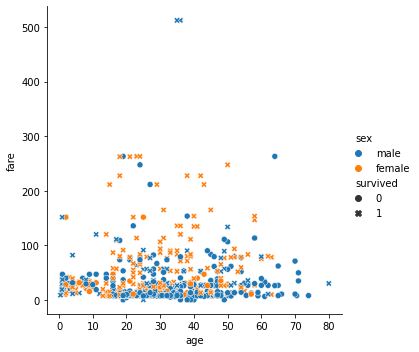

In [ ]:
sns.relplot(data=titanic, 
            x="age", 
            y="fare", 
            hue="sex", 
            style="survived");

In [ ]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Eniac

In [4]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

# Challenges:
Let's start combining some of the skills we've learnt with `.groupby()`, `datetime`, and `seaborn` (no pandas plotting this time, please use seaborn). 

Sometimes you may have to make a smaller DataFrame to help Seaborn. Here's a quick example of one way to plot the top 10 brands based on the amount of products sold.

In [5]:
ol_df = orderlines_qu.copy()
o_df = orders_qu.copy()
p_df = products_cl.copy()

In [ ]:
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [6]:
ol_df["short"] = ol_df["sku"].str[:3]
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,short
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,CRU
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,PEB
...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,APP
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,APP
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,APP
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,APP


In [8]:
ol_with_brands_df = ol_df.merge(brands, 
                                how="left", 
                                on="short")
ol_with_brands_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple


In [9]:
brands_10_most_sold_df = (
                         ol_with_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
5,Apple,11156
99,OWC,3857
161,Western Digital,2404
9,Belkin,2279
67,LaCie,2130
19,Crucial,2070
128,Satechi,1824
160,Wacom,1816
106,Pack,1710
91,NewerTech,1648


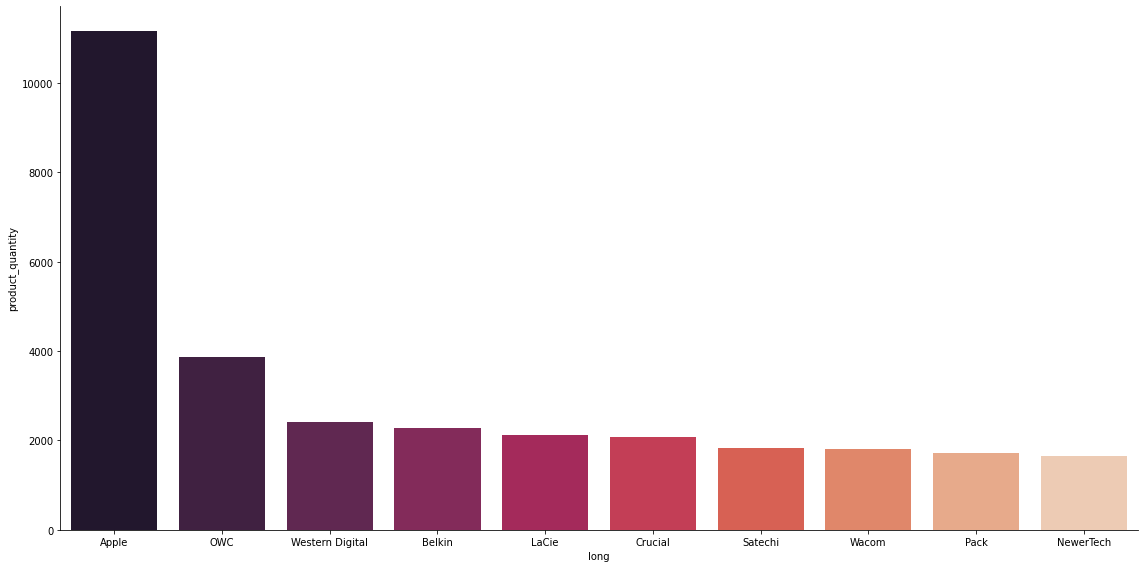

In [10]:
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="rocket");

## Challenge 2:
Create a scatter plot to explore the relationship between the recommended price for a product (`products_cl.price`) and the price that products actually sold for (`final_merged_orders_orderlines_df.ol_unit_price`)

**Hint:** You don't need to groupby here. Just bring a couple of tables together and then use seaborn.

In [14]:
# your code here
# check if the skus in orderlines are already inner joined with skus in products.
ol_df[ol_df['sku'].isin(p_df['sku'])].nunique()

id                  53231
id_order            40985
product_id              1
product_quantity       27
sku                  5098
unit_price           4342
date                52840
short                 195
dtype: int64

In [13]:
ol_df['sku'].nunique()

5098

In [ ]:
ol_df.info()

In [11]:
o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [18]:
ool_m = pd.merge(o_df, ol_df, how = 'inner', left_on = 'order_id', right_on = 'id_order')
ool_m

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40,PAR
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44,OWC
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,245275,0,1,TAD0007,149.00,2017-06-28 11:12:30,TAD
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,245595,0,2,PAC1561,52.99,2017-01-21 12:49:00,PAC
...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527042,2018-03-14 11:47:50,18.98,Completed,1649446,527042,0,1,APP0927,13.99,2018-03-14 11:42:38,APP
53227,527070,2018-03-14 11:50:48,24.97,Completed,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,APP
53228,527074,2018-03-14 11:51:42,24.97,Completed,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,APP
53229,527096,2018-03-14 11:58:40,34.96,Completed,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,APP


In [17]:
oolp_m = pd.merge(ool_m, p_df, on = 'sku')
oolp_m

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,2017-01-18 19:12:49,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,2017-01-07 17:13:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,2017-01-09 12:22:46,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,2017-01-10 15:23:11,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,526003,2018-03-12 16:02:53,411.98,Completed,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,NET,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,0,1334
53227,526066,2018-03-13 20:12:28,87.98,Completed,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,WAC,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405
53228,526093,2018-03-12 18:38:36,90.98,Completed,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,WAC,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405
53229,526440,2018-03-13 15:17:54,885.17,Completed,1648399,526440,0,1,PAC2235,878.18,2018-03-13 15:08:27,PAC,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,NAS storage server integrated with special foc...,1124.98,1,12175397


In [19]:
oolp_m.head(3)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,2017-01-18 19:12:49,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,2017-01-07 17:13:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397


**Suggested improvment:** colour code whether the price is higher, lower, or the same.

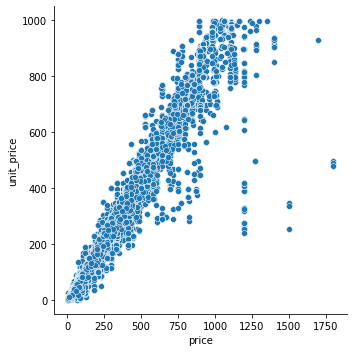

In [20]:
# your code here
sns.relplot(data = oolp_m,
            x = 'price',
            y = 'unit_price'
    
)


## Challenge 3:
Let's investigate when customers like to spend more money. Display the average daily price of an order on a line plot.

**Hint:** first work on finding the daily average of `o_total_paid`, make sure you have this saved as a DataFrame, then work on your plot using this DataFrame.

In [ ]:
#o_df['created_date'] = pd.to_datetime(o_df['created_date'])

In [21]:
o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
o_daily = o_df.groupby(pd.Grouper(key='created_date',freq='D'))['total_paid'].mean()
o_daily

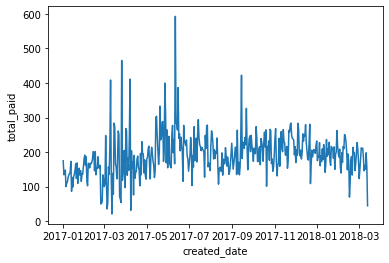

In [ ]:
sns.lineplot(data = o_daily)

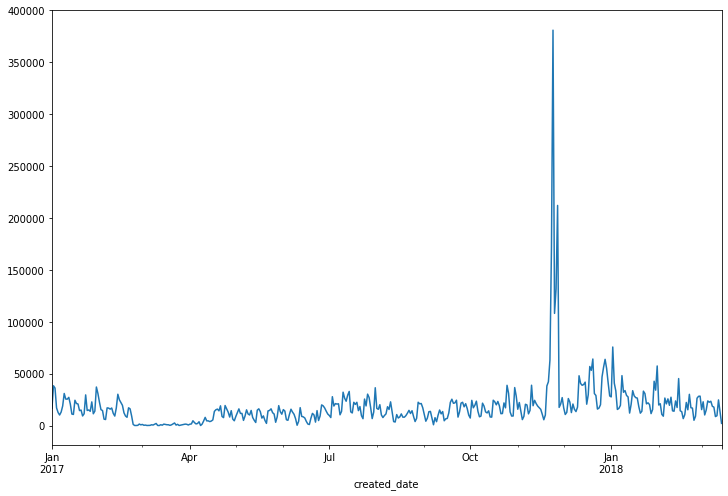

In [ ]:
# your code here with the method of resample.
# note: resample can only be used with plot.
(
    o_df
    .resample("D", on="created_date")
    .sum()["total_paid"]
    .plot(figsize=(12, 8))
 );

**Suggested improvement:** Often when we screenshot a plot for a presentation the font is small and hard to read. We want to make our point clearly, so let's increase the font size and add a title.

[Text(0.5, 1.0, 'Daily average total payment')]

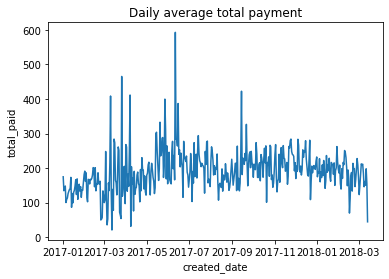

In [ ]:
# your code here
sns.lineplot(data = o_daily).set(title='Daily average total payment')

## Challenge 4:
Make a bar plot for the top 10 products sold in January 2017 & the top 10 products sold in January 2018.

In [ ]:
#oolp_m['created_date'] = pd.to_datetime(oolp_m['created_date'])

In [ ]:
# your code here
oolp_17Jan = oolp_m[oolp_m['created_date'].between("2017-01-01", "2017-01-31")]
oolp_18Jan = oolp_m[oolp_m['created_date'].between("2018-01-01", "2018-01-31")]

In [ ]:
oolp_nov2017 = oolp_m[oolp_m['created_date'].between("2017-11-01", "2017-11-30")]
oolp_nov2017.head(10)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
18,354568,2017-11-27 13:55:18,120.34,Completed,1458072,354568,0,1,LAC0212,116.35,2017-11-27 13:50:35,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
88,423323,2017-11-08 11:20:22,136.78,Completed,1400361,423323,0,1,LAC0212,131.79,2017-11-08 11:13:39,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
89,424352,2017-11-13 18:39:37,151.77,Completed,1402452,424352,0,1,LAC0212,131.79,2017-11-10 10:49:37,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
90,425261,2017-11-11 13:58:34,136.78,Completed,1404284,425261,0,1,LAC0212,131.79,2017-11-11 13:57:02,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
91,431560,2017-11-23 09:48:04,122.72,Completed,1421182,431560,0,1,LAC0212,115.73,2017-11-22 11:07:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
92,433451,2017-11-23 09:51:20,578.65,Completed,1425199,433451,0,5,LAC0212,115.73,2017-11-23 07:48:34,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
93,434132,2017-11-23 11:29:34,351.18,Completed,1426750,434132,0,3,LAC0212,115.73,2017-11-23 11:17:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
94,435263,2017-11-23 18:00:55,161.29,Completed,1429210,435263,0,1,LAC0212,116.35,2017-11-23 17:41:58,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
95,436687,2017-11-24 02:41:50,120.98,Completed,1432078,436687,0,1,LAC0212,115.99,2017-11-24 00:47:35,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397


In [ ]:
# your code here

oolp_dec2017 = oolp_m[oolp_m['created_date'].between("2017-12-01", "2017-12-31")]
oolp_dec2017.head(10)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type
123,450059,2017-12-08 20:39:37,257.79,Completed,1472904,450059,0,1,LAC0212,124.79,2017-12-02 19:19:44,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
125,451926,2017-12-01 15:49:36,450.15,Completed,1471209,451926,0,1,LAC0212,125.79,2017-12-01 13:02:32,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
126,454348,2017-12-03 13:06:57,153.06,Completed,1474398,454348,0,1,LAC0212,124.79,2017-12-03 12:39:42,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
127,458562,2017-12-12 14:06:50,129.78,Completed,1485495,458562,0,1,LAC0212,124.79,2017-12-09 21:13:11,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
128,458946,2017-12-10 13:50:37,128.78,Completed,1486613,458946,0,1,LAC0212,124.79,2017-12-10 13:19:37,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
129,459947,2017-12-11 15:48:44,131.78,Completed,1489107,459947,0,1,LAC0212,124.79,2017-12-11 15:43:38,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
130,461552,2017-12-13 10:06:13,131.78,Completed,1493076,461552,0,1,LAC0212,124.79,2017-12-13 09:52:30,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
131,462059,2017-12-13 18:44:14,259.58,Completed,1494392,462059,0,2,LAC0212,124.79,2017-12-13 17:57:37,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
132,465072,2017-12-19 11:58:47,124.79,Completed,1501167,465072,0,1,LAC0212,124.79,2017-12-17 21:02:54,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397
133,465968,2017-12-18 18:21:13,124.79,Completed,1503221,465968,0,1,LAC0212,124.79,2017-12-18 18:17:29,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397


In [ ]:
oolp_17Jan_t10 = (
    oolp_17Jan.groupby(["sku"])["product_quantity"]
    .sum()
    .nlargest(10)
)

In [ ]:
Top_10_products_sold_nov2017 = (
    oolp_nov2017.groupby(["sku"])["product_quantity"]
    .sum()
    .nlargest(10)
)
Top_10_products_sold_nov2017

sku
APP1190    329
APP1922    215
CRU0050    128
CRU0051    117
APP0698    111
WDT0183    111
NEA0009     98
PLA0027     82
MAT0007     75
SAN0186     72
Name: product_quantity, dtype: int64

In [ ]:
Top_10_products_sold_dec2017 = (
    oolp_dec2017.groupby(["sku"])["product_quantity"]
    .sum()
    .nlargest(10)
)
Top_10_products_sold_dec2017

sku
PAC2477    162
APP1190    112
APP1922     79
ZAG0036     67
CRU0051     58
NEA0020     56
SEA0049     42
AP20264     41
WDT0183     41
IFX0181     38
Name: product_quantity, dtype: int64

In [ ]:
oolp_18Jan_t10 = (
    oolp_18Jan.groupby(["sku"])["product_quantity"]
    .sum()
    .nlargest(10)
)

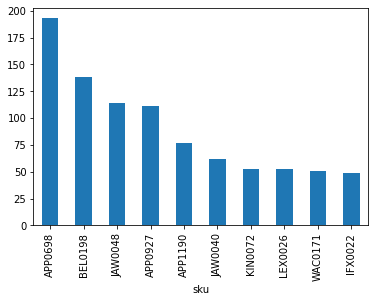

In [ ]:
oolp_17Jan_t10.plot(kind = 'bar')

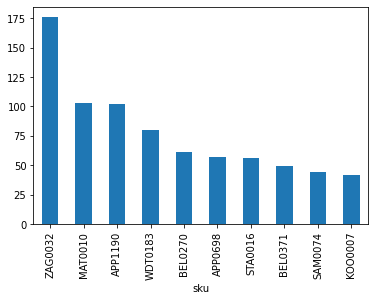

In [ ]:
oolp_18Jan_t10.plot(kind = 'bar')

**Suggested improvement:** By sharing the y-axis (default on figure-level plots) seaborn allows us to compare the years, so we can see what has changed in the top 10 year on year.

In [ ]:
# your code here
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

## Bonus challenge:
This challenge is an extra. We will not go through the solution in class. It's here for those of you who finish early or are inquisitive.

Find the top 10 brands that have generated the most revenue in the snapshot we have. Show the daily revenue generated by each of these brands on a line plot, use a seperate line for each brand.

In [ ]:
# your code here
oolp_m['short'] = oolp_m['sku'].str[:3]
oolp_m.head(1)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397


In [25]:
oolpb_m = pd.merge(oolp_m, brands, on = 'short')
oolpb_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53195 entries, 0 to 53194
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          53195 non-null  int64  
 1   created_date      53195 non-null  object 
 2   total_paid        53195 non-null  float64
 3   state             53195 non-null  object 
 4   id                53195 non-null  int64  
 5   id_order          53195 non-null  int64  
 6   product_id        53195 non-null  int64  
 7   product_quantity  53195 non-null  int64  
 8   sku               53195 non-null  object 
 9   unit_price        53195 non-null  float64
 10  date              53195 non-null  object 
 11  short             53195 non-null  object 
 12  name              53195 non-null  object 
 13  desc              53195 non-null  object 
 14  price             53195 non-null  float64
 15  in_stock          53195 non-null  int64  
 16  type              53184 non-null  object

In [26]:
oolpb_m.created_date.max()

'2018-03-14 12:03:52'

In [27]:
from google.colab import files
oolpb_m.to_csv("final.csv", index=False)
oolpb_m.to
files.download("final.csv")
#oolpb_m.info()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
oolp_17Jan_t10 = (
    oolp_17Jan.groupby(["sku"])["product_quantity"]
    .sum()
    .nlargest(10)
)
oolp_17Jan_t10

sku
APP0698    193
BEL0198    138
JAW0048    114
APP0927    111
APP1190     77
JAW0040     62
KIN0072     53
LEX0026     53
WAC0171     51
IFX0022     49
Name: product_quantity, dtype: int64

In [ ]:
top_30_type = (
    oolpb_m.groupby(["type"])["name"]
    .count()
    .sort_values(ascending = False)
)
top_30_type.head(30)

type
11865403    4373
11935397    3872
1364        3135
11905404    3123
5384        2319
12215397    1982
12655397    1832
12585395    1815
1296        1489
1230        1409
1405        1182
1231        1123
12175397    1093
1325        1067
13835403     971
42945397     860
12755395     854
13555403     822
13615399     821
13855401     818
10142        802
51601716     796
5398         781
12635403     713
1433         707
1229         684
14305406     683
12995397     670
13005399     669
1298         567
Name: name, dtype: int64

In [ ]:
oolpb_m.loc[oolpb_m["type"] == "1231", :]

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long
9528,250275,2017-11-19 22:34:54,54.99,Completed,1413938,250275,0,1,APP1190,51.00,2017-11-19 22:32:48,APP,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.0,1,1231,Apple
9529,293164,2017-11-23 18:05:25,54.99,Completed,1429262,293164,0,1,APP1190,51.00,2017-11-23 17:54:10,APP,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.0,1,1231,Apple
9530,301173,2017-01-03 05:12:38,58.99,Completed,1122690,301173,0,1,APP1190,58.99,2017-01-02 23:46:35,APP,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.0,1,1231,Apple
9531,301322,2017-01-03 09:37:34,58.99,Completed,1123012,301322,0,1,APP1190,58.99,2017-01-03 09:34:02,APP,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.0,1,1231,Apple
9532,301504,2017-01-03 12:17:45,58.99,Completed,1123386,301504,0,1,APP1190,58.99,2017-01-03 12:14:35,APP,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.0,1,1231,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14132,380514,2017-07-21 17:57:50,1001.00,Completed,1299136,380514,0,1,APP0665,71.00,2017-07-21 17:39:38,APP,AppleCare Protection Plan Mac mini,Apple Care extended warranty Mac Mini.,89.0,1,1231,Apple
14133,430139,2017-11-23 11:06:28,695.99,Completed,1426580,430139,0,1,APP0665,66.39,2017-11-23 10:55:22,APP,AppleCare Protection Plan Mac mini,Apple Care extended warranty Mac Mini.,89.0,1,1231,Apple
18091,408078,2017-10-04 16:45:55,194.98,Completed,1368987,408078,0,1,APP0664,189.99,2017-10-03 19:08:56,APP,AppleCare Mac Pro,Apple Care extended warranty Mac Pro.,249.0,0,1231,Apple
18092,419342,2017-10-29 20:08:00,193.98,Completed,1391934,419342,0,1,APP0664,189.99,2017-10-29 19:59:44,APP,AppleCare Mac Pro,Apple Care extended warranty Mac Pro.,249.0,0,1231,Apple


In [ ]:
oolpb_m.loc[oolpb_m['type'] == '11865403', 'category'] = 'Phone Leather cases'  
oolpb_m.loc[oolpb_m['type'] == '11935397', 'category'] = 'External Hard Drives '
oolpb_m.loc[oolpb_m['type'] == '1364', 'category'] = 'Mac Pro RAM'
oolpb_m.loc[oolpb_m['type'] == '11905404', 'category'] = 'Input Devices(cameras, detectors, etc..)'
oolpb_m.loc[oolpb_m['type'] == '5384', 'category'] = 'Headphones'
oolpb_m.loc[oolpb_m['type'] == '12215397', 'category'] = 'SSD Internal Hard drive'
oolpb_m.loc[oolpb_m['type'] == '12655397', 'category'] = 'Internal Hard drive SATA'
oolpb_m.loc[oolpb_m['type'] == '12585395', 'category'] = 'USB Adapters'
oolpb_m.loc[oolpb_m['type'] == '1296', 'category'] = 'Displays, Monitors'
oolpb_m.loc[oolpb_m['type'] == '1230', 'category'] = 'Apple lighting USB cables'
oolpb_m.loc[oolpb_m['type'] == '1405', 'category'] = 'Graphic Tablets for Mac & PC'
oolpb_m.loc[oolpb_m['type'] == '1231', 'category'] = 'Apple care'
oolpb_m.loc[oolpb_m['type'] == '12175397', 'category'] = 'Storage servers for Mac & PC'
oolpb_m.loc[oolpb_m['type'] == '1325', 'category'] = 'HDMI cables for Apple products'
oolpb_m.loc[oolpb_m['type'] == '13835403', 'category'] = 'Mac Book case'
oolpb_m.loc[oolpb_m['type'] == '42945397', 'category'] = 'Sandisk iXpand lighting'
oolpb_m.loc[oolpb_m['type'] == '12755395', 'category'] = 'Digital Temperature sensor kits'
oolpb_m.loc[oolpb_m['type'] == '13555403', 'category'] = 'Screen protectors for iphone'
oolpb_m.loc[oolpb_m['type'] == '13615399', 'category'] = 'USB Chargers'
oolpb_m.loc[oolpb_m['type'] == '13855401', 'category'] = 'Apple keyboard'
oolpb_m.loc[oolpb_m['type'] == '10142', 'category'] = 'Mac Book battery'
oolpb_m.loc[oolpb_m['type'] == '51601716', 'category'] = 'Second hand iPhones'
oolpb_m.loc[oolpb_m['type'] == '5398', 'category'] = 'Bluetooth speakers'
oolpb_m.loc[oolpb_m['type'] == '12635403', 'category'] = 'Ipad case'
oolpb_m.loc[oolpb_m['type'] == '1433', 'category'] = 'Expansion kits'
oolpb_m.loc[oolpb_m['type'] == '1229', 'category'] = 'Laser Pointer/Pen'
oolpb_m.loc[oolpb_m['type'] == '14305406', 'category'] = 'Kit of 5 tools'
oolpb_m.loc[oolpb_m['type'] == '12995397', 'category'] = 'Docks/Ports'
oolpb_m.loc[oolpb_m['type'] == '13005399', 'category'] = 'UPS system'
oolpb_m.loc[oolpb_m['type'] == '1298', 'category'] = 'Conditional MacBook, iPad and accessories (digital pen, Memory card)'
oolpb_m.loc[(oolpb_m['type'] != '11865403') & (oolpb_m['type'] != '11935397') & (oolpb_m['type'] != '1364')
                              & (oolpb_m['type'] != '11905404') & (oolpb_m['type'] != '5384') & (oolpb_m['type'] != '12215397') 
                              & (oolpb_m['type'] != '12655397') & (oolpb_m['type'] != '12585395') & (oolpb_m['type'] != '1296')
                              & (oolpb_m['type'] != '1230') & (oolpb_m['type'] != '1405') & (oolpb_m['type'] != '1231') 
                              & (oolpb_m['type'] != '12175397') & (oolpb_m['type'] != '1325') & (oolpb_m['type'] != '13835403')
                              & (oolpb_m['type'] != '42945397') & (oolpb_m['type'] != '12755395') & (oolpb_m['type'] != '13555403')
                              & (oolpb_m['type'] != '13615399') & (oolpb_m['type'] != '13855401') & (oolpb_m['type'] != '10142')
                              & (oolpb_m['type'] != '51601716') & (oolpb_m['type'] != '5398') & (oolpb_m['type'] != '12635403')
                              & (oolpb_m['type'] != '1433') & (oolpb_m['type'] != '1229') & (oolpb_m['type'] != '14305406')
                              & (oolpb_m['type'] != '12995397') & (oolpb_m['type'] != '13005399') & (oolpb_m['type'] != '1298')
                              , 'category'] = 'Other' 
oolpb_m

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long,category
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,2017-01-18 19:12:49,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,2017-01-07 17:13:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,2017-01-09 12:22:46,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,2017-01-10 15:23:11,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,2018-03-09 09:48:18,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)"
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,2018-03-09 11:19:26,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)"
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,2018-03-09 20:18:27,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)"
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,2018-03-11 11:41:19,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)"


In [ ]:
oolpb_m.groupby("category").count().nlargest(30, "sku")


,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long
category,,,,,,,,,,,,,,,,,,
Other,11163,11163,11163,11163,11163,11163,11163,11163,11163,11163,11163,11163,11163,11163,11163,11163,11152,11163
Phone Leather cases,4373,4373,4373,4373,4373,4373,4373,4373,4373,4373,4373,4373,4373,4373,4373,4373,4373,4373
External Hard Drives,3872,3872,3872,3872,3872,3872,3872,3872,3872,3872,3872,3872,3872,3872,3872,3872,3872,3872
Mac Pro RAM,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135
"Input Devices(cameras, detectors, etc..)",3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123
Headphones,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319,2319
SSD Internal Hard drive,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982
Internal Hard drive SATA,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832
USB Adapters,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815


In [ ]:
discount = oolpb_m['price'] - oolpb_m['unit_price']
oolpb_m['discount'] = discount
oolpb_m

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long,category,discount
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,10.83
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,2017-01-18 19:12:49,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,3.00
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,2017-01-07 17:13:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,3.00
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,2017-01-09 12:22:46,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,3.00
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,2017-01-10 15:23:11,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,2018-03-09 09:48:18,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)",50.00
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,2018-03-09 11:19:26,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)",50.00
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,2018-03-09 20:18:27,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)",50.00
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,2018-03-11 11:41:19,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)",50.00


In [ ]:
oolpb_m.discount.count()

53195

In [ ]:
oolpb_m1 = oolpb_m[oolpb_m.discount != None]
oolpb_m1.discount.count()

53195

In [ ]:
oolpb_m1.drop(oolpb_m1[(oolpb_m1['discount'] <= 0)].index, inplace=True)
oolpb_m

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long,category,discount
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,10.83
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,2017-01-18 19:12:49,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,3.00
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,2017-01-07 17:13:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,3.00
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,2017-01-09 12:22:46,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,3.00
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,2017-01-10 15:23:11,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,External Hard Drives,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,2018-03-09 09:48:18,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)",50.00
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,2018-03-09 11:19:26,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)",50.00
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,2018-03-09 20:18:27,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)",50.00
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,2018-03-11 11:41:19,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,"Input Devices(cameras, detectors, etc..)",50.00


In [ ]:
oolpb_m1.discount.count()

49369

In [ ]:
disc_categ = (
    oolpb_m1.groupby(["category"])["discount"]
    .mean(["discount"])
    .nlargest(30).round(2))
disc_categ

category
Second hand iPhones                                                     66.41
Displays, Monitors                                                      61.38
Expansion kits                                                          61.23
Conditional MacBook, iPad and accessories (digital pen, Memory card)    53.30
Graphic Tablets for Mac & PC                                            50.81
Bluetooth speakers                                                      46.49
Storage servers for Mac & PC                                            42.57
SSD Internal Hard drive                                                 36.18
Other                                                                   34.76
Docks/Ports                                                             33.39
External Hard Drives                                                    33.04
Internal Hard drive SATA                                                32.74
Headphones                                             

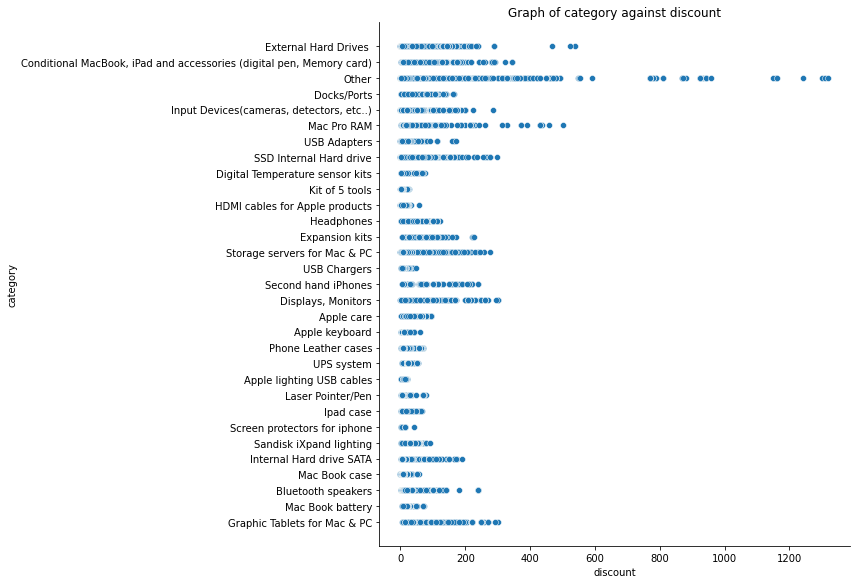

In [ ]:
sns.relplot(data=oolpb_m1, 
            y="category", 
            x="discount",
            height=8, 
            aspect=1.5
            ).set(title='Graph of category against discount');

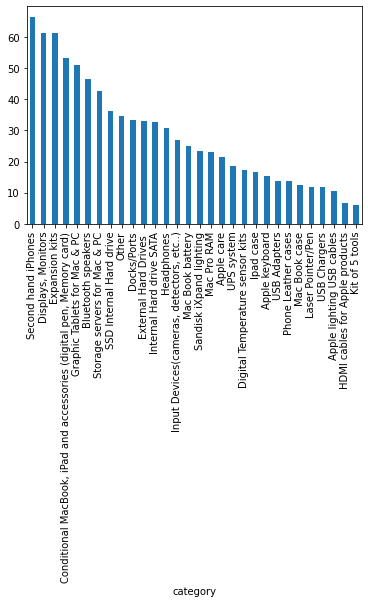

In [ ]:
disc_categ.plot(kind = 'bar')

In [ ]:
incom_categ = (
    oolpb_m1.groupby(["category"])["unit_price"]
    .sum(["unit_price"])
    .nlargest(30))

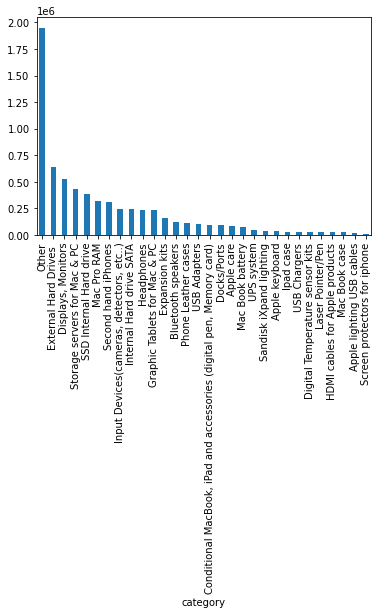

In [ ]:
incom_categ.plot(kind = 'bar')

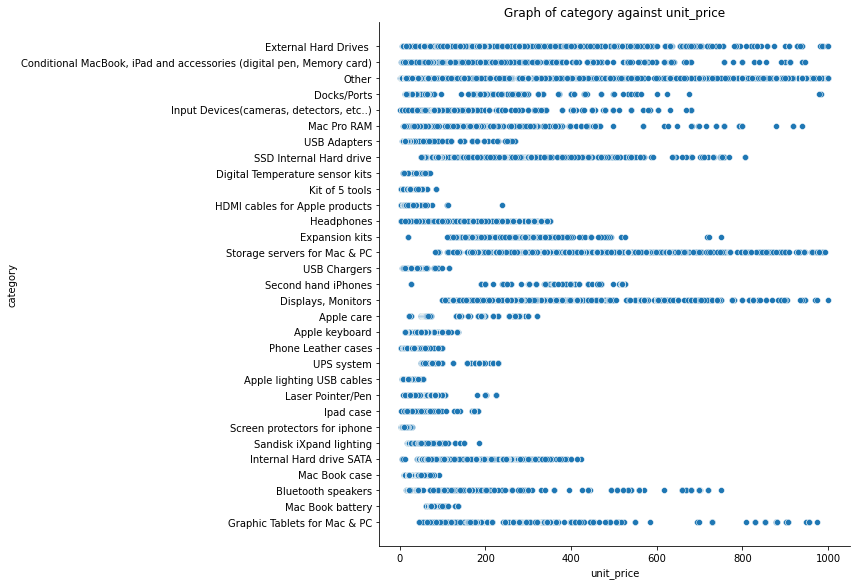

In [ ]:
sns.relplot(data=oolpb_m1, 
            y="category", 
            x="unit_price",
            height=8, 
            aspect=1.5
            ).set(title='Graph of category against unit_price');

In [ ]:
oolpb_m.plot(kind = 'bar')

In [ ]:
disc_daily = oolpb_m1.groupby(pd.Grouper(key='created_date',freq='M'))['discount'].mean()

In [ ]:
sns.lineplot(data = disc_daily)

In [ ]:
(
    oolpb_m1
    .resample("D", on="created_date")
    .sum()["discount"]
    .plot(figsize=(12, 8))
 );

In [ ]:
(
    oolpb_m1
    .resample("M", on="created_date")
    .sum()["unit_price"]
    .plot(figsize=(12, 8))
 );

In [ ]:
oolpb_m1.unit_price.describe()

In [ ]:
#oolpb_m.loc[oolpb_m.desc.str.lower().str.contains('apple'), 'Apple/Non_apple'] = 'Apple'

#oolpb_m.loc[oolpb_m.desc.str.lower().str.contains('apple'), 'Apple/Non_apple'] = 'Non_apple'